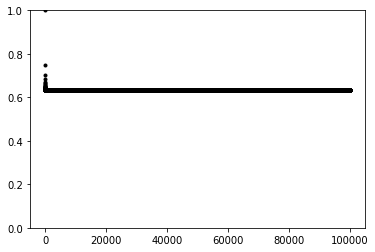

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
x = range ( 1,100000 )
p =(1 - (1-np.divide( 1,x))**x)
plt.ylim ( 0 , 1 )
plt.plot(x,p, ".",color="black")


Ariana Ayaviri , TP 2
Matias Ricardo Mendez

Not gradded part.

In [12]:
from random import choices
B=10000
sum4=0
for b in range ( 1 ,B+1):
    bsample=np.random.choice(range ( 1 , 101 ) , 100 )
    if np.count_nonzero( bsample==4)>0:
        sum4+=1
sum4/=B
print ( sum4 )

0.6314


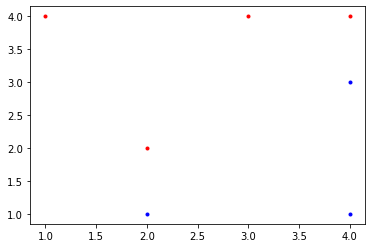

In [13]:
x1_r = [3,2,4,1]
x2_r = [4,2,4,4]

x1_b = [2,4,4]
x2_b = [1,3,1]

#x2 menor a cutro azul
#mayor si x1
plt.plot(x1_r,x2_r, ".",color="red")
plt.plot(x1_b,x2_b, ".",color="blue")

β0 + β1X1 + β2X2 = 0
b0 + 2 x1 + 1 x2 = 0
1.5 + 2 x1 = 1 x2

Graded Part

In [14]:
auto = pandas.read_csv("auto.txt", ";")

[graded question] First of all, use the Pandas library to read the file auto.txt to an object called auto. Use the command auto.mpg.describe() to calculate descriptive statistics for mpg. Comment on the results in terms of mean, standard deviation, quartiles, etc.

In [15]:
auto["mpg"].describe()
#print(auto)

count    300.000000
mean      23.699333
std        7.963814
min        9.000000
25%       17.000000
50%       23.600000
75%       29.925000
max       46.600000
Name: mpg, dtype: float64

--- ANSWER --- = The median value of the miles per gallon is 23.7. After also taking a look at the description of the data set, it could be observed that the values move from 9.0 as a minimum to 46.0 mpg as a maximum, with a standard deviation of 7.9 which is explains how similar or far is the behavior of column from the median.

In [16]:
import pandas
x_test = pandas.read_csv( "x_test.csv",index_col = 0)
x_train = pandas.read_csv( "x_train.csv", index_col = 0)
y_test_reg = pandas.read_csv( "y_test.csv", index_col = 0)
y_train_reg = pandas.read_csv( "y_train.csv", index_col = 0)

print(y_train_reg)
#print(y_test_reg)
print(x_train)
print(x_test)

     mpg01
134      0
145      0
63       1
293      1
285      1
..     ...
251      1
192      0
117      0
47       0
172      0

[240 rows x 1 columns]
     cylinders  displacement  horsepower  weight
134          4         115.0          95    2694
145          6         250.0         105    3353
63           4          97.0          92    2288
293          4          91.0          67    1965
285          4         151.0          90    2735
..         ...           ...         ...     ...
251          4          91.0          67    1850
192          8         260.0         110    3365
117          6         250.0          72    3432
47           8         400.0         175    4385
172          6         231.0         105    3425

[240 rows x 4 columns]
     cylinders  displacement  horsepower  weight
208          4         119.0          97    2405
188          4          98.0          66    1800
12           6         200.0          85    2587
221          8         302.0        

2.1 Regression Trees

In [17]:
from sklearn import tree
regr_tree_auto = tree.DecisionTreeRegressor(max_depth = 2 )
regr_tree_auto.fit(x_train , y_train_reg )


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.07144451966128669


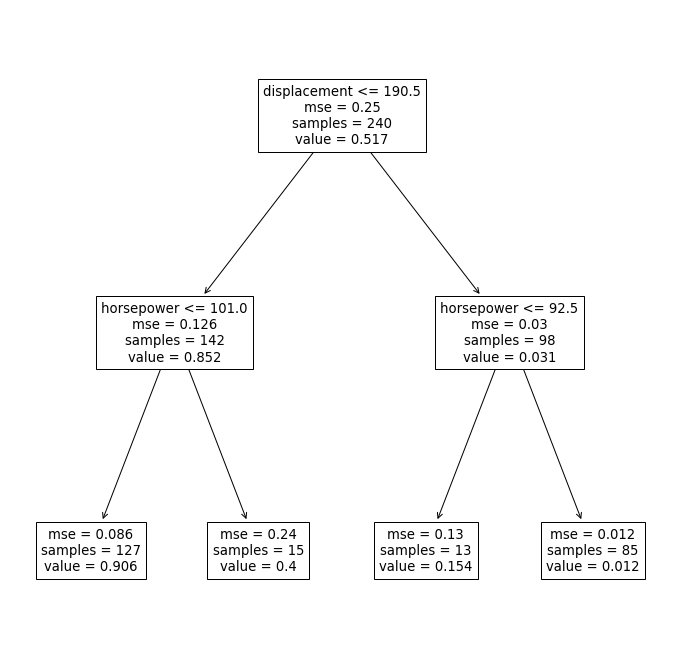

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
plt.figure( figsize=(12,12))
tree.plot_tree(regr_tree_auto,feature_names=x_train.columns )

print(regr_tree_auto)
x_train.describe()

print(mean_squared_error(y_train_reg , regr_tree_auto.predict(x_train)))


(a) Each node of the plotted tree contains information concerning the mean squared error
(MSE), the number of samples, etc. Interpret this information for the topmost node in the
tree.

--- ANSWER --- = The displacement <= 159.5 separates the data in two parts, the part <= 159.5 and the part > 159.5.
The squared_error is 
The samples are 240 in the top node because the total data in x_train is 240, and since is the first division of the data, for the moment is complete.
The value is 23.853, what means the mean of all displacement variables that are part of this node (in this case there are every displacement data because is the first node).



(b) How many terminal nodes does the tree have ?

--- ANSWER --- = The tree have 4 terminal nodes.

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
(c) What is the value of the train MSE ?

--- ANSWER --- = The value of the train MSE is 15.3


(d) What would be the predicted value gas mileage for a car with engine displacement 170
(cu. inches) and engine horsepower 130.

--- ANSWER --- = The predicted value gas mileage for this car will be 14.467.

[graded question] Use the function predict() to make predictions for the test set and calculate the test MSE. You can use the mean_squared_error function from sklearn.metrics. Compare the two errors and conclude if there is overfitting. If so, propose a solution (without calculating) to reduce the overfitting.

--- ANSWER --- =

In [19]:
import numpy as np
#import sklearn.metrics as mean_squared_error
from sklearn.metrics import mean_squared_error
yhat= regr_tree_auto.predict(x_test)
#print(pandas.DataFrame(yhat))
#print(y_test_reg)
arr= y_test_reg.to_numpy()
print(mean_squared_error(y_test_reg,yhat))
#print(mean_squared_error(np.array(y_test_reg) , np.array(pandas.DataFrame(yhat))))

0.10474041206829506


2. [graded question] Use the function predict() to make predictions for the test set and calculate
the test MSE. You can use the mean_squared_error function from sklearn.metrics. Compare
the two errors and conclude if there is overfitting. If so, propose a solution (without calculating)
to reduce the overfitting.

The MSE for the trained values was 15.3 and for the test values is 23.7. It s a lot of difference, so we can affirm that there is an overfitting. It means that the train data divide the values tu overfit with the examples of the train data set. To get it better we could use the Cost complexity pruning or wakest approach. This approach grow a very large tree and prune it back to obtain a more little subtree that can have the lowest test error possible.

2.2 Classification Trees

Now you will use classification trees to predict whether a given car gets high or low gas mileage, denoted mpg01 in Lab2. To fit a classification tree you will use the function DecisionTreeClassi- fier(). For instance, to fit a decision tree of maximum depth 3 you can run the commands :

     mpg01
134      0
145      0
63       1
293      1
285      1
..     ...
251      1
192      0
117      0
47       0
172      0

[240 rows x 1 columns]


[Text(418.5, 713.475, 'displacement <= 190.5\ngini = 0.499\nsamples = 240\nvalue = [116, 124]'),
 Text(209.25, 509.625, 'horsepower <= 101.0\ngini = 0.252\nsamples = 142\nvalue = [21, 121]'),
 Text(104.625, 305.775, 'horsepower <= 81.5\ngini = 0.171\nsamples = 127\nvalue = [12, 115]'),
 Text(52.3125, 101.92499999999995, 'gini = 0.05\nsamples = 78\nvalue = [2, 76]'),
 Text(156.9375, 101.92499999999995, 'gini = 0.325\nsamples = 49\nvalue = [10, 39]'),
 Text(313.875, 305.775, 'weight <= 2931.5\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(366.1875, 101.92499999999995, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(627.75, 509.625, 'horsepower <= 92.5\ngini = 0.059\nsamples = 98\nvalue = [95, 3]'),
 Text(523.125, 305.775, 'displacement <= 255.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(470.8125, 101.92499999999995, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(575.4375, 101.924999

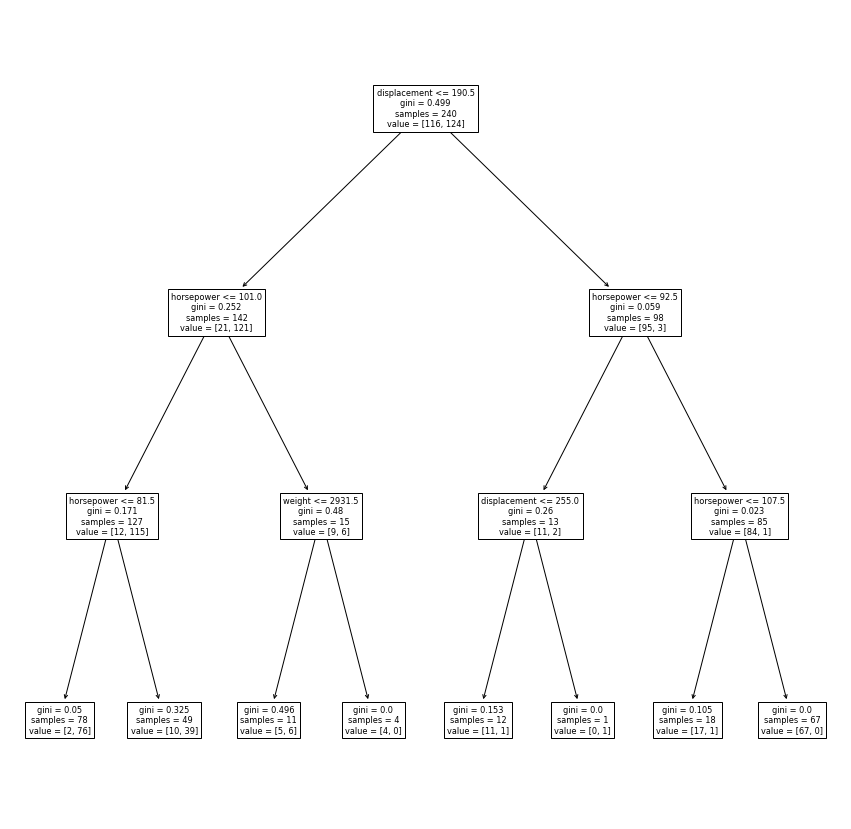

In [20]:
y_test = pandas.read_csv( "y_test.csv", index_col = 0)
y_train = pandas.read_csv( "y_train.csv", index_col = 0)
print(y_train)
class_tree_auto=tree.DecisionTreeClassifier(max_depth=3)
class_tree_auto.fit(x_train , y_train)
plt.figure( figsize=(15,15))
tree.plot_tree(class_tree_auto,feature_names=x_train.columns )

[graded question] Plot the tree with the plot_tree function and answer the following questions :
1. Interpret the value of the Gini index in the topmost node ? How was it calculated ?

The gini index is 0.499 in the topmost node. it´s a really good indicator because when Gini index is a small value it means that a node contains predominantly obervations for one class and that´s not appropriate. We try to have branches that separates the data in equal parts mostly, because if we have a branch that just has 1 data, it means is already overfitting and separating is not necessary in this cases.

To calculate it, we calculate first  the proportion of training observations in region m that belong to one class,
we multiply it by 1-this same value.
and we calculate it for the other class and make the summatory.
For exemple, in this case: 

142/240 = 0.591
0.59 * (1-0.59) = 0.24

98/240 = 0.4
o.4 * (1-0.4) = 0.24

0.24+024 = 0.48



2. Will the gas mileage be high for a car with engine displacement 120 (cu. inches) and engine
horsepower 100 ?

According to the plotted tree and looking at the data set, the MPG is going to have a low value below the median.

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ lo cheque comparando con el dataset y viendo el value

In [21]:
prun_tree_auto=tree.DecisionTreeClassifier(random_state=1)
path = prun_tree_auto.cost_complexity_pruning_path(x_train,y_train)
alphas,impurities = path.ccp_alphas,path.impurities

class_tree_auto_list=[]
for alpha in alphas :
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha )
    clf.fit(x_train , y_train )
    class_tree_auto_list.append (clf)
    
class_tree_autolist = class_tree_auto_list[: -1]
alphas = alphas [: -1]
print(class_tree_autolist)
print(alphas)


[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.00257936507936508, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0025925925925925934, class_weight=None,
                       criterion='gini', max_depth=None, m

In [22]:
from sklearn.metrics import accuracy_score
import pandas
scores_foreach = []
depth = []
sc_train = []
clfs = []
for i in class_tree_autolist:
    print(i)
    auto_tree = i.fit(x_train , y_train)
    clfs.append(i)
    y_foreach= auto_tree.predict(x_test)
    y_predict_train = auto_tree.predict(x_train)
    print(y_foreach)
    score = accuracy_score(y_test, y_foreach)
    scores_foreach.append(score)
    print(accuracy_score(y_train, y_predict_train))
    print(score)
    print(auto_tree.get_depth())
    depth.append(auto_tree.get_depth())
    sc_train.append(accuracy_score(y_train, y_predict_train))
    
print(scores_foreach)
print(alphas)
node_counts = [clf.tree_.node_count for clf in clfs]
print(node_counts)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
[1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0]
1.0
0.8666666666666667
11
DecisionTreeClassifier(ccp_alpha=0.00257936507936508, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, spli

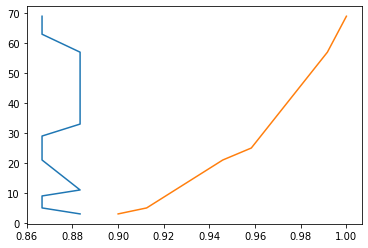

In [23]:
import matplotlib.pyplot as plt
plt.plot( scores_foreach,node_counts, "-")
plt.plot(sc_train , node_counts, "-")
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
select = class_tree_autolist[len(class_tree_autolist)-3]
auto_tree_res = select.fit(x_train , y_train)
y_res= auto_tree_res.predict(x_test)

print(auto_tree_res.get_n_leaves())


print ( confusion_matrix ( y_res, y_test ) )
print ( classification_report ( y_res , y_test , digits =3))


#train error
accuracy = accuracy_score(y_train , auto_tree_res.predict(x_train))
print(1 - accuracy)

#test error
test_error_ac = accuracy_score(y_test, y_res)
print(1 - test_error_ac)

print(mean_squared_error(y_test,y_res))

5
[[28  2]
 [ 6 24]]
              precision    recall  f1-score   support

           0      0.824     0.933     0.875        30
           1      0.923     0.800     0.857        30

    accuracy                          0.867        60
   macro avg      0.873     0.867     0.866        60
weighted avg      0.873     0.867     0.866        60

0.07916666666666672
0.1333333333333333
0.13333333333333333


c) [graded question] Finally, calculate the accuracy using the function score() for each fitted tree
in the train and the test set and choose the best value of α. How many leaves does the chosen tree
have ? Plot the train and test accuracy versus the tree size. 
Comment on the obtained results.

So we can see when the nodes are increasing the accuracy is increasing too, for the train data, because it s an overfitting.
For the test data the two better accuracy we have are with 4 and 8 levels and we are going to choose the tree of 4 levels, because it s a good performance with not that much levels, to avoid overfitting. This tree has 5 leaves and the value of α for this tree is aprox 0.92083.

What are the estimated train and test error for the chosen classifier ? Calculate the confusion
matrix and the classification report (see Lab2) and interpret the performance metrics.

The estimated train error is 0.079 what is very little, but the estimated test error is 0.133 what is bigger.
The confussion matrix has 28 true positives, 2 false positives, 6 false negatives and 24 true negatives what is okay.
But the false negatives are almost a 1/5 of the total real negatives, so, in fact this model is better than the other one, but is not better than the models of the past tp,but still a possible model.


In [25]:
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier

bagging_auto = RandomForestClassifier ( max_features = 4 , random_state = 1)
bagging_auto.fit(x_train , y_train.mpg01)

print(accuracy_score(y_train, bagging_auto.predict(x_train)))
print(accuracy_score(y_test, bagging_auto.predict(x_test)))

1.0
0.8666666666666667


1. Calculate the train and test accuracy and interpret the results.

Well, the result for the train accuracy is 1, wich means is perfect. We could thing is an overfitting but is possible is not, because normally the method of the Random Forest Classifier grow a really big tree with pure nodes, with random data (boosting), so is really possible to fit the data in a tree of pure nodes with this method. The accuracy score of the test is not that bad, what means that the method performs on an acceptable way.

2. [graded question] Modify the code of the previous question in order to perform random forests
with m =√p. Calculate the train and test accuracy and interpret.

Here, we can see that the accuracy of the train data is also 1, maybe for the sames reasons. In this case we are just taking sqrt of p in the max_features, and the results are very similar with the entire p results, but a little less effifcient. Ii can be maybe because there are 2 predonimant classifiers and they have the same influence in both models.

In [26]:
bagging_auto_sqrt = RandomForestClassifier ( max_features=2 , random_state = 1)
bagging_auto_sqrt.fit(x_train , y_train.mpg01)

print(accuracy_score(y_train, bagging_auto_sqrt.predict(x_train)))
print(accuracy_score(y_test, bagging_auto_sqrt.predict(x_test)))



1.0
0.8833333333333333


3. [graded question] Perform gradient boosting using the following input parameters in the function : learning rate λ = 1, maximum d = 1 and set the random state to 0. Calculate the train and test accuracy and interpret.

Here, the accuracy for both, test and train data are a little low than in the past excercise. But a good point for this model is that the test and train accuracy are more similar than in the other two past models. It is because in this kind of model the data grows slowly and try at each step to fit to the errors of the tree and perform well in each step.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
y_grad_b = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train.mpg01)
print(accuracy_score(y_train, y_grad_b.predict(x_train)))
print(accuracy_score(y_test, y_grad_b.predict(x_test)))


0.9125
0.85


[0.12551411 0.4123364  0.09606823 0.36608126]


Text(0.5, 0, 'Variable Importance')

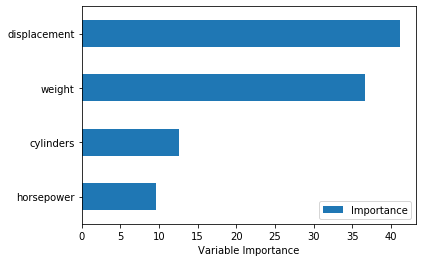

In [28]:
print(bagging_auto.feature_importances_)
Importance = pandas.DataFrame({ "Importance" :bagging_auto.feature_importances_*100},
index = x_train .columns)
Importance.sort_values(by = "Importance" , axis = 0,ascending = True).plot(kind = "barh" )
plt.xlabel( "Variable Importance" )

4. [graded question] Although Bagging, Random Forests and Boosting methods lose in interpretability in comparison to a single decision tree, it is possible to measure the importance of each
predictor. This information is stored in the attribute feature_importances_. For instance,
for the bagging classifier you can obtain the variable importance with the command bagging_auto.feature_importances_. Calculate the variable importance for the three classifiers
(bagging, random classifier and boosting). Interpret and comment on the results. In addition
you can make a barplot chart of the variable importance :

We can see that there are two predominant classifiers, desplacement and weight. It was our supposition in the second question of this part. It means that the decision tree has to start with this two predictors, and separate data based on it. 


---- SUPPORT VECTOR MACHINES ----

In [29]:
from sklearn.svm import SVC
svm_auto = SVC(C=1, kernel="linear" )
svm_auto.fit(x_train , np.ravel(y_train ))
y_svm = svm_auto.predict(x_test)
print(svm_auto.support_)
print(y_svm)
print(y_train)
print ( confusion_matrix (y_svm, y_test ) )
print ( classification_report ( y_svm , y_test , digits =3))

[  0  13  19  20  21  31  35  39  55  77 101 111 113 117 118 128 130 145
 164 173 178 186 190 198 215 229 232 239   4  11  15  24  32  41  45  54
  61  93 110 116 125 136 137 139 148 150 154 159 163 169 189 191 197 209
 212]
[1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0]
     mpg01
134      0
145      0
63       1
293      1
285      1
..     ...
251      1
192      0
117      0
47       0
172      0

[240 rows x 1 columns]
[[28  2]
 [ 6 24]]
              precision    recall  f1-score   support

           0      0.824     0.933     0.875        30
           1      0.923     0.800     0.857        30

    accuracy                          0.867        60
   macro avg      0.873     0.867     0.866        60
weighted avg      0.873     0.867     0.866        60



In [43]:
#amount of support vector machines
print(len(svm_auto.support_))

55


Calculate the confusion matrix and the accuracy for the test set and comment on the results.
The command svm_auto.support_ outputs a list of the support vectors. How many support
vectors does the model have ?

--- ANSWER --- = After looking at the matrix and the report, it is interesting to observe that it has a similar behavior to the results thrown by the best decision tree classificator, which means that we could have sabed all the computational cost of the getting the best tree, by just using the SVM which threw the same results. Finally it can be infered that the success of the SVM could be due to its 55 suport vectors.


In [30]:

from sklearn.model_selection import GridSearchCV
tuned_parameters = [{ "C" : [0.001, 0.01, 0.1, 1, 5, 10]}]
svm_auto_CV = GridSearchCV(SVC(kernel="linear" ), tuned_parameters, cv=10, scoring="accuracy")
svm_auto_CV.fit (x_train, np. ravel(y_train))
print(svm_auto_CV.best_params_)

{'C': 0.001}


What is the best value of C in terms of accuracy ? The best parameter value can be obtained
with command svm_auto_CV.best_params_.

--- ANSWER --- = The best params function showed c=0.001 as the best parameter for C

Fit the SVM classifier to the train set with chosen value of C. How many support vectors does
the model have ? Calculate performance metrics (accuracy, confusion matrix, etc), comment on
the results.

--- ANSWER IN CODE--- =

In [51]:
#Training SVM with best C
svm_best_c = SVC(C=0.001, kernel="linear" )
svm_best_c.fit(x_train , np.ravel(y_train ))
y_svm_best_c = svm_best_c.predict(x_test)

In [52]:
print(len(svm_best_c.support_))
#print(y_svm_best_c)
#print(y_train)
print ( confusion_matrix (y_svm_best_c, y_test ) )
print ( classification_report ( y_svm_best_c , y_test , digits =3))

62
[[27  2]
 [ 7 24]]
              precision    recall  f1-score   support

           0      0.794     0.931     0.857        29
           1      0.923     0.774     0.842        31

    accuracy                          0.850        60
   macro avg      0.859     0.853     0.850        60
weighted avg      0.861     0.850     0.849        60



@@@@@@@@@@@@@@@@@@@@@@@@@@@@
--- ANSWER (Interpretation) ---  = In this case with a C=0.001 which showed to be the best one while using the best_params function, this SVM is using 62 vectors, while the classification report and the matrix seems to be worse than the previous one while using C=1, probably due to its overfitting while using 62 vectors, in comparison with the last one which used 50.

3.

Text(0, 0.5, 'X2')

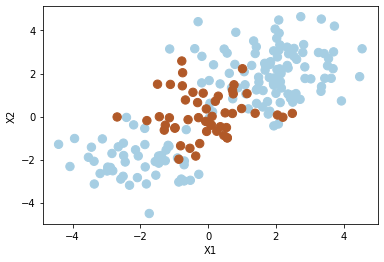

In [54]:
np.random.seed (8)
X = np.random.randn(200,2)
X[: 100] = X[: 100 ] +2
X[ 101: 150] = X[ 101: 150] -2
Y = np. concatenate ( [ np. repeat (-1,150) , np. repeat (1,50)] )
plt.scatter(X[:,0] ,X[ : , 1 ] , s=70, c=Y, cmap=plt.cm.Paired )
plt.xlabel ( "X1" )
plt.ylabel ( "X2" )


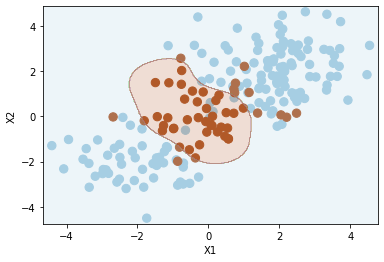

In [56]:
svm_radial = SVC(C=1.0, kernel='rbf' , gamma=1)
svm_radial.fit(X, Y)
plt.scatter(X[:,0], X[:,1], s=70, c=Y, cmap=plt.cm.Paired)
plt.xlabel( 'X1' )
plt.ylabel('X2' )
h=0.02
pad=0.25
x_min, x_max = X[: , 0].min()-pad, X[: , 0].max()+pad
y_min, y_max = X[: , 1].min()-pad, X[: , 1].max()+pad
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
Z = svm_radial.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)


 [graded question] Fit an SVM with a radial kernel. You will need to specify the value of ther parameter γ. Perform 10-fold-CV in order to select the best values of the tuning parameters C and γ. You can use the following code :

In [77]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1,2,3,4]}]
svm_radial_auto_CV=GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')

svm_radial_auto_CV.fit(x_train , np.ravel(y_train ))

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.5, 1, 2, 3, 4]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
print(svm_radial_auto_CV.best_params_)

{'C': 1, 'gamma': 0.5}


In [64]:
#Training SVM with best C
svm_best_c_gamma = SVC(C=1, gamma=0.5, kernel="linear" )
svm_best_c_gamma.fit(x_train , np.ravel(y_train ))
y_svm_best_c_gamma = svm_best_c_gamma.predict(x_test)
#print(svm_radial_auto_CV.support_)

print ( confusion_matrix (y_svm_best_c_gamma, y_test ) )
print ( classification_report ( y_svm_best_c_gamma , y_test , digits =3))

[[28  2]
 [ 6 24]]
              precision    recall  f1-score   support

           0      0.824     0.933     0.875        30
           1      0.923     0.800     0.857        30

    accuracy                          0.867        60
   macro avg      0.873     0.867     0.866        60
weighted avg      0.873     0.867     0.866        60



--- ANSWER --- = As it can be observed, the classification report metrics have improved than with C=0.001 and a default gamma, so now the results are the same as when using the best decision tree, so the process to get the best SVM is probably very similar in cost to get the best decision tree. It can be inferred that the largest C value and the smallest gamma value worked at our favor in this case probably due to the fact that the penalty argument is large, so there were be less support vectors violating the margin.

[graded question] Fit an SVM with a polynomial kernel. You will need to specify the degree of the polynomial kernel. Perform 10-fold-CV in order to select the best values of the tuning parameters C among [0.1, 1, 10] and polynomial degree [3,4,5]. Calculate performance metrics (accuracy, confusion matrix, etc), comment on the results.

In [79]:
polynomial_parameters = [{'C': [0.1, 1, 10], 'degree': [3,4,5]}]
svm_polynomial=GridSearchCV(SVC(kernel='rbf'), polynomial_parameters, cv=10, scoring='accuracy')
svm_polynomial.fit(x_train , np.ravel(y_train ))
print(svm_polynomial.best_params_)

{'C': 1, 'degree': 3}


In [80]:
y_svm_polynomial = svm_polynomial.predict(x_test)
#print(svm_radial_auto_CV.support_)

print ( confusion_matrix (y_svm_polynomial, y_test ) )
print ( classification_report ( y_svm_polynomial , y_test , digits =3))

[[27  3]
 [ 7 23]]
              precision    recall  f1-score   support

           0      0.794     0.900     0.844        30
           1      0.885     0.767     0.821        30

    accuracy                          0.833        60
   macro avg      0.839     0.833     0.833        60
weighted avg      0.839     0.833     0.833        60



---ANSWER--- = The best values were {'C': 1, 'degree': 3}, however, the classification report scores' did not improve in comparision with the SVM with the parameters {'C': 1, 'gamma': 0.5}, however it can be infered that the best value for C it's 1 in which ever SVM, while curiously the linear function worked better in this scenario than the polynomial one maybe due to a probably in overfitting, but it is still not that far from the best result if we look at the confusion matrix for the test set, where we can observe there is only one less true positive.

[graded question] Make a summary table with the performance metrics of all the classifiers fitted in this lab and make your general conclusions.

--- ANSWER --- = As it can be observed, the accuracy in all of the classifiers moves around 0.82 to 0.89 which means that they all present very similar and limitated behavior. After configuring all these different models we can observe that their computational cost its very similar as well in order to get the best scores with different parameters for each classifier. However, the classifier that showd the best performance of all, is the Random Forest with the parameters of:
- max_features= 2
- random_state= 1

It can be infered that the classifer allowed to reduce succesfully the variance between all the trees when averaging the estimates so it can be concluded that the decorrelation of these trees was the best solution for this scenario.

